# Male and Female Difference in Top Highest Suicide Rate Countries
This code is to analyse the male and female comparison in top 5 countries with hight suicide rates

catplot (for categorical data) from Seaborn library is used for visualisation 

In [2]:
# ========= Import the packages =========
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sys

# Importing Customised Common Data Reader Class
sys.path.append(os.path.abspath('..'))
from common_lib.data_reader import SuicideDataReader, SuicideProcessedData

In [4]:
# ========= Getting Data =========

# Use common Data Reader Class to load data
data_reader = SuicideDataReader()

# Load Suicide Rate data
suicide_rate_data = data_reader.read_data(SuicideProcessedData.SUICIDE_RATES, tidy=True)
#print(suicide_rate_data)

          country         sex   age_range  suicide_rate
0     Afghanistan  Both sexes  unnamed: 0           0.0
1     Afghanistan        Male  unnamed: 0           1.0
2     Afghanistan      Female  unnamed: 0           2.0
3         Albania  Both sexes  unnamed: 0           3.0
4         Albania        Male  unnamed: 0           4.0
...           ...         ...         ...           ...
5485       Zambia        Male     all_age         343.6
5486       Zambia      Female     all_age         102.1
5487     Zimbabwe  Both sexes     all_age         406.7
5488     Zimbabwe        Male     all_age         584.7
5489     Zimbabwe      Female     all_age         275.6

[5490 rows x 4 columns]


In [17]:
# ========= Prepare Data =========

# Find Top 5 countries of highest suicide rate in 'all_age' and "both sexes"
# And Male/ Female - Age distribution 
top_5_suicide_rate_bothsex = suicide_rate_data[(suicide_rate_data['sex'] == 'Both sexes' ) & (suicide_rate_data['age_range'] == 'all_age' )].nlargest(5, 'suicide_rate')
#print(top_5_suicide_rate_bothsex)

suicide_rate_separatesex = suicide_rate_data[(suicide_rate_data['sex'] != 'Both sexes') & (suicide_rate_data['age_range'] == 'all_age' )]
#print(suicide_rate_separatesex)

## Get the countries names of top 5 highest suicide rate
top_5_country_names = top_5_suicide_rate_bothsex['country'].to_list()

## Filtering out Male/Female records belongs to the hightest countries.
top5_suicide_rate = suicide_rate_separatesex[suicide_rate_separatesex['country'].isin(top_5_country_names)]
print("top5_suicide_rate",top5_suicide_rate.head())

top5_suicide_rate             country     sex age_range  suicide_rate
5059  Côte d'Ivoire    Male   all_age         541.2
5060  Côte d'Ivoire  Female   all_age         193.8
5221        Lesotho    Male   all_age         289.4
5222        Lesotho  Female   all_age         568.2
5299        Nigeria    Male   all_age         321.3


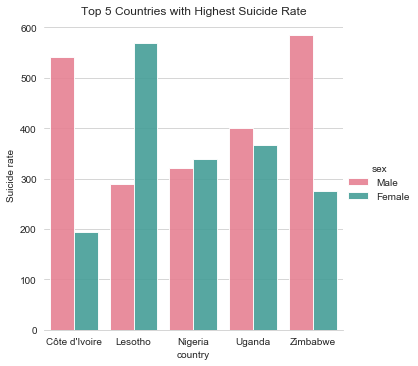

In [14]:
# ========= Plotting =========

sns.set_style("whitegrid")
gg = sns.catplot(data = top5_suicide_rate, kind="bar", x="country", y="suicide_rate",hue="sex", palette="husl", alpha=.9, height=5, ci=None)
gg.despine(left=True).set_ylabels("Suicide rate")
plt.title("Top 5 Countries with Highest Suicide Rate")
plt.show()